<a href="https://colab.research.google.com/github/Claudio9701/Intro-to-ML-Regression-Models/blob/main/Regresi%C3%B3n_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt # Plotting
import numpy as np # Linear algebra
import pandas as pd # Data Handling
import sklearn as sk # Machine Learning
from sklearn.datasets import load_boston # https://scikit-learn.org/stable/datasets/index.html

## Regresión Linear

Haremos una implementación simple de regresión lineal y la aplicaremos a un dataset de prueba para un caso univariado y otro multivariado.

### Pasos a seguir

1. Descarga de datos
2. Visualización
3. Implementación
4. Aplicación
5. Evaluación e Interpretación

In [ ]:
X, y = load_boston(return_X_y=True)

In [ ]:
X.shape, y.shape

((506, 13), (506,))

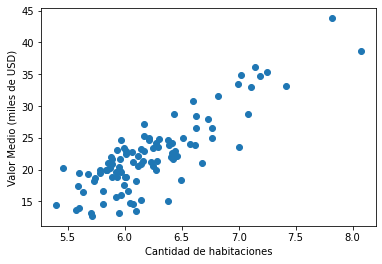

In [ ]:
plt.scatter(x=X[:100,5], y=y[:100])
plt.xlabel('Cantidad de habitaciones')
plt.ylabel('Valor Medio (miles de USD)')
plt.show()

In [ ]:
X_1 = np.column_stack((X[:100,5], np.ones_like(X[:100,5])))
y_1 = y[:100]

$$\beta = (X^TX)^-1 X^T Y$$

In [ ]:
beta = np.linalg.inv(X_1.T.dot(X_1)).dot(X_1.T).dot(y_1)

In [ ]:
y_1_hat = X_1.dot(beta)

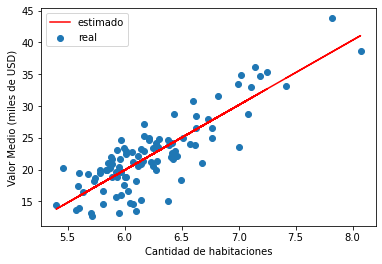

In [ ]:
plt.scatter(x=X_1[:,0], y=y_1, label='real')
plt.plot(X_1[:,0], y_1_hat, color='r', label='estimado')
plt.xlabel('Cantidad de habitaciones')
plt.ylabel('Valor Medio (miles de USD)')
plt.legend()
plt.show()

In [ ]:
ss_fit = np.sum(np.power(y_1 - y_1_hat, 2))

In [ ]:
ss_mean = np.sum(np.power(y_1 - y_1.mean(), 2))

In [ ]:
r_2 = (ss_mean - ss_fit) / ss_mean

In [ ]:
r_2

0.7165734030076696

In [ ]:
def linear_regression(X, y):
  X = np.column_stack((np.ones_like(X[:,0]), X))

  betas = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
  y_hat = X.dot(betas)

  print('Coeficientes: ', betas)

  ss_fit = np.sum(np.power(y - y_hat, 2))
  ss_mean = np.sum(np.power(y - y.mean(), 2))
  r_2 = (ss_mean - ss_fit) / ss_mean

  print('R^2: ', (r_2*100))

In [ ]:
linear_regression(X[:,5], y)

Coeficientes:  [-34.67062078   9.10210898]
R^2:  48.352545599133414


In [ ]:
linear_regression(X, y)

Coeficientes:  [ 3.64594884e+01 -1.08011358e-01  4.64204584e-02  2.05586264e-02
  2.68673382e+00 -1.77666112e+01  3.80986521e+00  6.92224640e-04
 -1.47556685e+00  3.06049479e-01 -1.23345939e-02 -9.52747232e-01
  9.31168327e-03 -5.24758378e-01]
R^2:  74.06426641094095
